In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from nanoscale_test import fieldplot2

In [10]:
import scattnlay
from scattnlay import fieldnlay
from scattnlay import scattnlay

In [11]:
WL=456.33 #nm 				# wave length
core_r = 90.0			# partical radius

x = np.ones((1), dtype = np.float64)
x[0] = core_r

npts = 151					# plot will be npts x npts
factor=1.1					# area of plot

index = 4.615+0.131j	# refractive index
nm = 1.0						# refractive index of host media

m = np.ones((1), dtype = np.complex128)
m[0] = index/nm

In [12]:
scan = np.linspace(-factor*x[-1], factor*x[-1], npts)
zero = np.zeros(npts*npts, dtype = np.float64)

coordX, coordZ = np.meshgrid(scan, scan)
coordX.resize(npts * npts)
coordZ.resize(npts * npts)
coordY = zero

coordPlot1 = coordX
coordPlot2 = coordZ

normalize_units = np.vectorize(lambda t: t/WL*2.0*np.pi)

coord = np.vstack((coordX), normalize_units(coordY), normalize_units(coordZ))).transpose()
_, E, H = fieldnlay(np.array([normalize_units(x)]), np.array([m]), coord, pl=-1)
Ec = E[0, :, :]
#Hc = H[0, :, :]
#P = np.array(map(lambda n: np.linalg.norm(np.cross(Ec[n], Hc[n])).real, range(0, len(E[0]))))

CPU times: user 78 ms, sys: 52.1 ms, total: 130 ms
Wall time: 62.5 ms


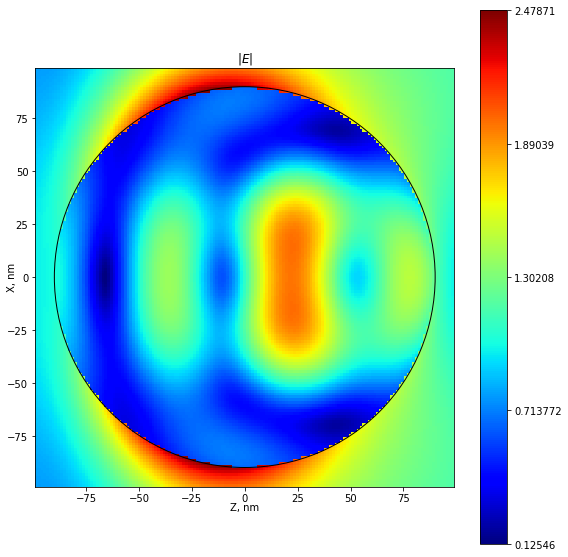

In [13]:
%%time

flow_total = 0

Er = np.absolute(Ec)
Eabs = np.sqrt(Er[:, 0]**2 + Er[:, 1]**2 + Er[:, 2]**2)

fieldplot2(flow_total, Eabs, coordX, coordZ, x, m, npts, factor)